## Handwritten Digit Recognition - MNIST Dataset - CNN - Python/Keras

In [1]:
from keras.datasets import mnist
from keras import layers, models
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np

#### Load Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**Training Set**
- 60000 images
- Each image is of the shape 28 x 28 (rows x columns)
- 60000 labels defining the digit that corresponds to the respective image

<br>**Test Set**
- 10000 images
- Each image is of the shape 28 x 28 (rows x columns)
- 10000 labels defining the digit that corresponds to the respective image

Training data:


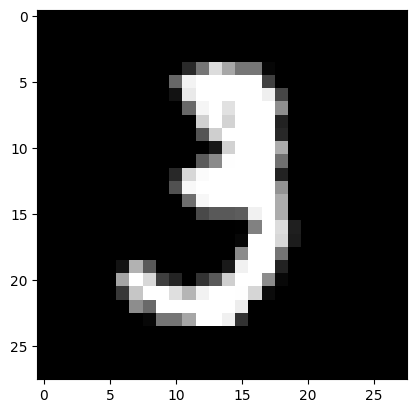

Label of this image is 3


In [3]:
plt.gray()
index = 10
print("Training data:")
plt.imshow(train_images[index])
plt.show()
print("Label of this image is",train_labels[index])

#### Data Preprocessing - Train and Test Images

In [4]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
train_images , test_images = train_images / 255.0 , test_images / 255.0

#### Define Model

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
# model_cnn.summary()

#### Compile the model with standard optimizer function, loss function and metrics

In [6]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #98.97 - adam 99.23 - rmsprop

#### Train the Model

In [7]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 60,validation_data=(test_images, test_labels)) 

Epoch 1/5


1000/1000 [==============================] - 12s 11ms/step - loss: 0.1491 - accuracy: 0.9544 - val_loss: 0.0381 - val_accuracy: 0.9868
Epoch 2/5
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0428 - accuracy: 0.9868 - val_loss: 0.0322 - val_accuracy: 0.9903
Epoch 3/5
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0296 - accuracy: 0.9909 - val_loss: 0.0254 - val_accuracy: 0.9920
Epoch 4/5
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0396 - val_accuracy: 0.9868
Epoch 5/5
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0.0268 - val_accuracy: 0.9922


#### Test the Model

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', (test_acc*100))

313/313 [==============================] - 2s 5ms/step - loss: 0.0268 - accuracy: 0.9922
Test accuracy: 99.22000169754028


In [9]:
sample_index = 10  
sample = test_images[sample_index]
true_label = test_labels[sample_index]

sample = np.expand_dims(sample, axis=0)

predictions = model.predict(sample)
predicted_label = np.argmax(predictions)

print("True Label:", true_label)
print("Predicted Label:", predicted_label)


1/1 [==============================] - 0s 167ms/step
True Label: 0
Predicted Label: 0
